# Margem Máxima com Perceptron

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from utils import make_normal_data

# Dados Sintéticos

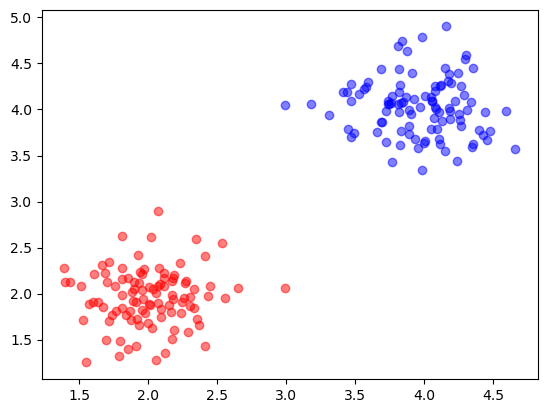

In [2]:
s1 = 0.3
s2 = 0.3
c1 = np.array([2,2])
c2 = np.array([4,4])
n1 = 100
n2 = 100
x1, y1 = make_normal_data(s = s1, n = n1, c = c1, dim = 2, label = 1)
x2, y2 = make_normal_data(s = s2, n = n2, c = c2, dim = 2, label = -1)
xall = np.vstack((x1, x2))
yall = np.hstack((y1, y2))
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Perceptron

In [3]:
def calc_margin_braga(w, X_aug):
    margins = X_aug @ w

    # Índice do maior margin negativo
    neg_margins = margins[margins < 0]
    if neg_margins.size > 0:
        max_neg = np.max(neg_margins)
        imax_neg = np.where(margins == max_neg)[0][0]
    else:
        imax_neg = None

    # Índice do menor margin positivo
    pos_margins = margins[margins > 0]
    if pos_margins.size > 0:
        min_pos = np.min(pos_margins)
        imin_pos = np.where(margins == min_pos)[0][0]
    else:
        imin_pos = None

    return imax_neg, imin_pos, margins

def perceptron(xall, yallall, max_iter=10000, eta = 0.1, lambda_ = 0.1):
    """
    Implementação do algoritmo Perceptron.
    :param xall: matriz de dados (n_samples, n_features)
    :param yall: vetor de rótulos (n_samples,)
    :return: w: vetor de pesos (n_features,)
    """
    X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
    w = np.zeros(X_aug.shape[1])
    for epoch in range(max_iter):
        updated = False
        indices = np.random.permutation(X_aug.shape[0])

        for i in indices:
            imax_neg, imin_pos, margins = calc_margin_braga(w, X_aug)
            if yall[i] * (w @ X_aug[i, :]) <= 0 or calc_margin_braga(w, X_aug)[0]:
                w += yall[i] * X_aug[i, :] + lambda_ * np.linalg.norm(w)
                updated = True
            # err = yall[i] - np.sign(np.dot(w, X_aug[i, :])) + lambda_ * np.linalg.norm(w)
            # w += eta * err * X_aug[i, :]

        if not updated:
            break

    return w

Pesos: [inf inf inf]


/tmp/ipykernel_10526/3876530716.py:11: RuntimeWarning: invalid value encountered in divide
  y = -(w[0] + w[1] * x) / w[2]


TypeError: unsupported format string passed to numpy.ndarray.__format__

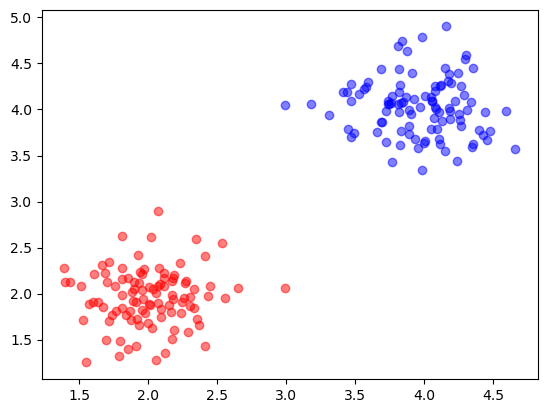

In [4]:
# Plot dos dados de treinamento
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Cálculo e plot da linha de decisão
w = perceptron(xall, yall, max_iter=10000, eta = 0.1, lambda_ = 0.1)
print(f"Pesos: {w}")
x_min, x_max = plt.xlim()
x1_min, x1_max = plt.ylim()
x = np.linspace(x_min, x_max, 100)
y = -(w[0] + w[1] * x) / w[2]
plt.plot(x, y, 'k-', label = 'Decision boundary')

# Cálculo da margem
X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
imax_neg, imin_pos, margins = calc_margin_braga(w, X_aug)
print(f"Margens \nMaxima Negativa: {margins[imax_neg]:.2f} \nMinima Positiva: {margins[imin_pos]:.2f}")